In [1]:
from seidel import simple_seidel
from image_processing import screened_poisson
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import glob
import os
from joblib import Parallel, delayed

In [15]:
# Load and preprocess the image
f = cv2.imread("./input/im0.png")
if f is None:
    print(f"Error: Image file not found.")
    

In [17]:
f = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
f = f.astype(np.float64) / 255
maxf = np.max(f)
minf = np.min(f)
f = (f - minf) / (maxf - minf)

iter =   100; err = 2.058e-04
iter =   200; err = 1.394e-04
iter =   300; err = 1.199e-04
iter =   400; err = 1.039e-04


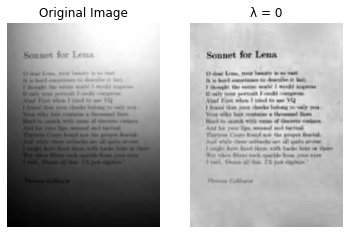

iter =   100; err = 1.961e-04
iter =   200; err = 1.261e-04
iter =   300; err = 1.031e-04


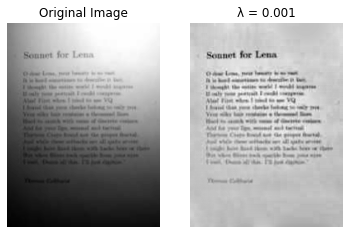

iter =   100; err = 1.614e-04


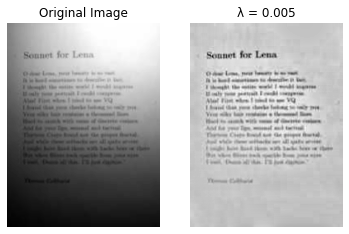

iter =   100; err = 1.266e-04


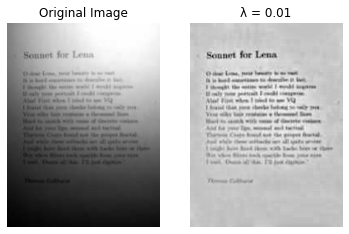

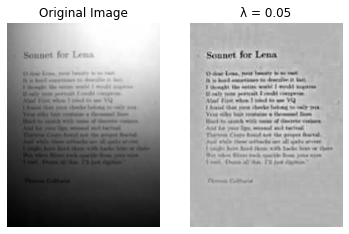

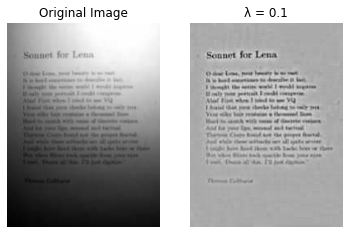

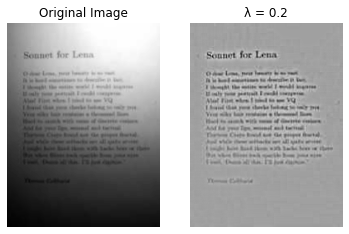

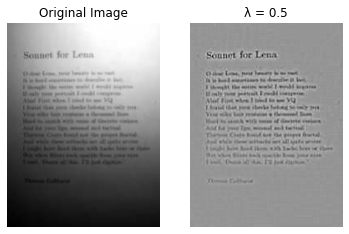

In [18]:
lambdas = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5]
for lam in lambdas:
    U = screened_poisson(lam, f)
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(f, cmap='gray')
    plt.axis('off')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(U, cmap='gray')
    plt.axis('off')
    plt.title(f'λ = {lam}')
    plt.savefig(f'lam_{lam}.png')
    plt.pause(1e-5)
    plt.show()

In [5]:
def process_image(image_path, LamArray, output_directory):
    # Load and preprocess the image
    f = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if f is None:
        print(f"Error: Image file '{image_path}' not found.")
        return [image_path, None, None, None] + [None] * len(LamArray)
    
    f = f.astype(np.float64) / 255
    maxf = np.max(f)
    minf = np.min(f)
    f = (f - minf) / (maxf - minf)

    row = [image_path, f.shape[0], f.shape[1], f.shape[0] * f.shape[1]]

    for Lam in LamArray:
        start_time = time.time()
        U = screened_poisson(Lam, f)
        end_time = time.time()
        execution_time = end_time - start_time
        row.append(execution_time)

        # Save the output image
        output_filename = os.path.join(output_directory, f"{os.path.basename(image_path).split('.')[0]}_lambda_{Lam}.png")
        cv2.imwrite(output_filename, (U * 255).astype(np.uint8))
    
    return row

In [4]:
path_to_pictures = "./input/im*.png"
output_directory = "./output"
LamArray = [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2]
image_paths = glob.glob(path_to_pictures)

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

    # Table header
header = ["Image Path", "Vertical Pixels", "Horizontal Pixels", "Total Pixels"] + [f"Time (λ={Lam})" for Lam in LamArray]
table = [header]

    # Process images in parallel
results = Parallel(n_jobs=-1)(delayed(process_image)(image_path, LamArray, output_directory) for image_path in image_paths)
table.extend(results)
    
    # Print the table
for row in table:
    print(" | ".join(map(str, row)))

Image Path | Vertical Pixels | Horizontal Pixels | Total Pixels | Time (λ=0.0001) | Time (λ=0.0005) | Time (λ=0.001) | Time (λ=0.01) | Time (λ=0.05) | Time (λ=0.1) | Time (λ=0.15) | Time (λ=0.2)
./input/im4.png | 216 | 197 | 42552 | 5.7751641273498535 | 2.4439408779144287 | 1.718189001083374 | 0.2940530776977539 | 0.08778190612792969 | 0.0515289306640625 | 0.03454113006591797 | 0.02622675895690918
./input/im5.png | 450 | 297 | 133650 | 9.345710039138794 | 4.030755996704102 | 2.378131866455078 | 0.541358232498169 | 0.1943359375 | 0.10660767555236816 | 0.07191801071166992 | 0.05782008171081543
./input/im1.png | 216 | 218 | 47088 | 6.025465726852417 | 3.396857261657715 | 1.8060238361358643 | 0.32183289527893066 | 0.07364487648010254 | 0.040963172912597656 | 0.027067899703979492 | 0.022891998291015625
./input/im0.png | 249 | 186 | 46314 | 1.979992151260376 | 0.9948079586029053 | 0.9264781475067139 | 0.25119686126708984 | 0.09551429748535156 | 0.047287940979003906 | 0.04623007774353027 | 0.